# Introduction
## Goal.
The goal of this lab is to investigate, by means of agent-based simulations, an example
of Evolutionary Robotics. In particular, we will focus on a maze navigation robot task, and see
how Evolutionary Algorithms can be used to solve this problem.

Note once again that, unless otherwise specified, in this module’s exercises we will use real-valued
genotypes and that the aim of the algorithms will be to minimize the fitness function $f(x)$, i.e.
lower values correspond to a better fitness!

# Exercise 1
In this exercise we will perform an Evolutionary Robotics experiment to evolve the controller of a robot navigating a certain environment. This task is usually referred to as “maze navigation”. In principle, this kind of experiments can be done in hardware, i.e. with physical robots and a physical arena (this kind of approach is usually called embodied evolution). While embodied evolution is a quite powerful approach, it also presents several challenges due to limited battery lifetime, hardware issues/faults, costs, time-consuming experiments, etc. Here, for simplicity we will perform similar experiments in silico, i.e. by means of agent-based simulations. Note however that this is actually the typical approach used in Evolutionary Robotics, where usually simulations are performed first, and then the simulated experiments are replicated in materio (i.e. with physical hardware), to assess the so-called “reality-gap” and validate the solution.

Here, we will perform simplified 2-D kinematic simulations of a maze navigation task performed by an agent represented by a car.

The task is to drive from the bottom left of the map to the green zone in the upper right corner.
The car is equipped with 6 sensors: distance and bearing to the target position and, optionally, 4 lidar sensors. 
The first two return the distance and the angle between the car and the target. The lidars return the distance between the car and a possible obstacle in the range $[0,1]$. Hence, a value of $1$ indicates that there are no obstacles in the range of the lidar ($100$ pixels).
Instead, if a lidar returns $0$ it indicates that the car is colliding with an obstacle. 

A Feed Forward Neural Network (FFNN) moves the car on the map. The FFNN has $2$ or $6$ inputs, depending on if the lidars are activated, and $5$ outputs. The agent selects the action by the argmax of the outputs, and the possible actions are: turn left or right, accelerate or decelerate, and stop the car. 
The hidden structure of the network is composed of $l$ layers of $n$ nodes, where $l$ and $n$ are configurable parameters. 

The evolutionary algorithm has to optimize the weights of the FFNN, and the total number of parameters is $inputs \times n + l \times n^2 + n \times outputs$ if $n>=1$ else $inputs \times  outputs$. 
All the network’s weights range in $[−3, 3]$.

This script will perform a maze navigation Evolutionary Robotics experiment in a first scenario (environment without obstacles). This experiment uses an Evolutionary Algorithm to evolve the synaptic weights of the described Neural Network. The synaptic weights, which represent the genes of the individuals, are coded using real-coded values (floating point). A population of such individuals is evolved, using tournament selection, Gaussian mutation, n-point crossover,
and elitism (see exercise_maze.py for more details about the algorithmic configuration and parametrization). The genotypes of the first generation are initialized randomly in the range $[-3,3]$. Elitism is used to make sure that good solutions are not lost because of mutation or crossover, while the rest of the population is generated by means of the genetic operators. At each generation, the genotypes (i.e., the encoded controllers) generated by the EA are sent to the simulator (one batch per generation), which then translates the genotypes it receives into a set of Neural Network controllers, evaluates the controllers and sends the fitness back to the EA. 
At the end of the evolutionary process, the script will save a pickle containg the best genome (file best_seed.pkl, where seed is the seed used) found, and other information needed to run the simulation a posteriori.
You can “replay” the best candidate, by running this command:

``python3 post_eval.py best.pkl``

where ``best.pkl`` is the path to the pickle file.

---

Design and implement a fitness function that would allow the robot to reach the target as fast as possible. To do so, you can modify the function ``fitness_eval`` coded in the next cell. Five metrics are computed by the simulator and can be used to devise different fitness functions, namely:
- *distanceToTarget*: the distance to target at the end of the simulation (default);
- *pathLength*: the total distance traveled by the robot;
- *noOfTimestepsWithCollisions*: the no. of timesteps when the robot had a collision with an obstacle or a wall (ranging in [0,250]);
- *timestepToReachTarget*: the no. of timesteps needed for the robot to reach the target (ranging in [0,250]);
- *timestepsOnTarget*: the no. of timesteps spent by the robot on the target (ranging in [0,250]);

By using one or more of these five quantities properly into one single fitness value, different robot behaviors can be evolved. Please note that, by default, the RobotEvaluator is formulated as a minimization problem (see the flag ``maximize = False``). However, if you deem it more appropriate, you can change the flag to turn it into a maximization problem. 
**NOTE**: While you design the fitness function, be careful about divisions by zero and make sure that when you divide one integer variable by another you cast your variables to float, to avoid unexpected behaviors due to integer divisions.

- Is the Evolutionary Algorithm able to evolve a Neural Network controller that can reach the target? What kind of motion strategy does it use?

Utilizzare solo i sensori di: Distanza dal target e Angolo al target. Disabilito i idar

- What is the minimum-complexity Neural Network controller that you can think of? Hint: think about the necessity of using all the available sensor inputs in this case, and if any of them can be discarded (see the configuration dictionary to disable inputs). Also, consider reducing the no. if hidden nodes and test different network configurations to identify the simplest controller.


- By looking at the weights of the best evolved Neural Network in the simplest case you just found, can you try to make sense of the controller functioning? (Note that weights appear ordered by layer and, for each layer, by node.)

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         0         10 2555.82713 1008.09762 1796.97412 1738.38874 560.653241

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         1         20 1622.87641 470.178688 1008.09762 1077.26148 315.820568

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         2         30 1008.09762 470.178688 1007.46297 803.759821 251.797129

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         3         40 1008.09762 336.798105 470.178688 520.212358 201.069576

Generation Evaluation      Worst       Best     Median    Average    Std

''

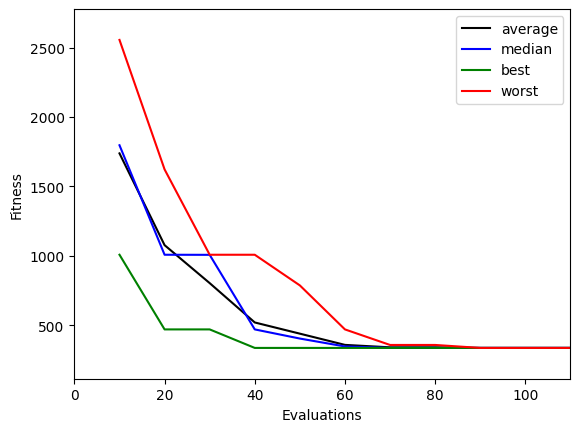

In [25]:
!pip3 install pygame
from utils.utils_9.exercise_maze import *
import os 

# --------------------------------------------------------------------------- #
# Change this part, but not the map
def fitness_eval0(distanceToTarget, pathLength, noOfTimestepsWithCollisions,
                 timestepToReachTarget, timestepsOnTarget):
    fitness = distanceToTarget  
    return fitness

def fitness_eval1(distanceToTarget, pathLength, noOfTimestepsWithCollisions,
                 timestepToReachTarget, timestepsOnTarget):
    fitness = distanceToTarget  # Penalizziamo la distanza residua al target.
    # Penalizziamo il numero di timesteps necessari per raggiungere il target.
    if timestepToReachTarget > 0:
        fitness += 1 * timestepToReachTarget
    # Penalizziamo le collisioni (molto importante da evitare).
    fitness += 3.0 * noOfTimestepsWithCollisions
    # Penalizziamo percorsi troppo lunghi (per incentivare l'efficienza).
    fitness += 0.5 * pathLength
    # Incentiviamo se il robot rimane sul target.
    if timestepsOnTarget > 0:
        fitness -= 5.0 * timestepsOnTarget
    return fitness

config = {"sensors": False,
            "nrHiddenNodes":  5,
            "nrHiddenLayers": 10,
            "map":"white.png"
         }
seed = 0
rng = NumpyRandomWrapper(seed)


# --------------------------------------------------------------------------- #
# EA configuration
display = True

popSize = 10  # population size
numGen = 10  # used with generation_termination
numEval = 2500  # used with evaluation_termination
tournamentSize = 2  # tournament size (default 2)
mutationRate = 0.2  # mutation rate, per gene (default 0.1)
gaussianMean = 0  #  mean of the Gaussian distribution used for mutation
gaussianStdev = 0.1  #  std. dev. of the Gaussian distribution used for mutation
crossoverRate = 1.0  # rate at which crossover is performed (default 1.0)
numCrossoverPoints = 1  # number of crossover points used (default 1)
selectionSize = popSize  # selection size (i.e. how many individuals are selected for reproduction)
numElites = 1  # no. of elites (i.e. best individuals that are kept in the population)

# the evolutionary algorithm (EvolutionaryComputation is a fully configurable evolutionary algorithm)
#  standard GA, ES, SA, DE, EDA, PAES, NSGA2, PSO and ACO are also available
ea = inspyred.ec.EvolutionaryComputation(rng)

# observers: provide various logging features
if display:
    ea.observer = [inspyred.ec.observers.stats_observer,
                   plot_observer]
    # inspyred.ec.observers.file_observer,
    # inspyred.ec.observers.best_observer,
    # inspyred.ec.observers.population_observer,

#  selection operator
# ea.selector = inspyred.ec.selectors.truncation_selection
# ea.selector = inspyred.ec.selectors.uniform_selection
# ea.selector = inspyred.ec.selectors.fitness_proportionate_selection
# ea.selector = inspyred.ec.selectors.rank_selection
# ea.selector = inspyred.ec.selectors.tournament_selection

ea.selector = inspyred.ec.selectors.rank_selection

# variation operators (mutation/crossover)
ea.variator = [inspyred.ec.variators.gaussian_mutation,
               inspyred.ec.variators.n_point_crossover]
# inspyred.ec.variators.random_reset_mutation,
# inspyred.ec.variators.inversion_mutation,
# inspyred.ec.variators.uniform_crossover,
# inspyred.ec.variators.partially_matched_crossover,

# replacement operator
# ea.replacer = inspyred.ec.replacers.truncation_replacement
# ea.replacer = inspyred.ec.replacers.steady_state_replacement
# ea.replacer = inspyred.ec.replacers.random_replacement
# ea.replacer = inspyred.ec.replacers.plus_replacement
# ea.replacer = inspyred.ec.replacers.comma_replacement
# ea.replacer = inspyred.ec.replacers.crowding_replacement
# ea.replacer = inspyred.ec.replacers.simulated_annealing_replacement
# ea.replacer = inspyred.ec.replacers.nsga_replacement
# ea.replacer = inspyred.ec.replacers.paes_replacement
# ea.replacer = inspyred.ec.replacers.generational_replacement
ea.replacer = inspyred.ec.replacers.simulated_annealing_replacement

# termination condition
# ea.terminator = inspyred.ec.terminators.evaluation_termination
# ea.terminator = inspyred.ec.terminators.no_improvement_termination
# ea.terminator = inspyred.ec.terminators.diversity_termination
# ea.terminator = inspyred.ec.terminators.time_termination
# ea.terminator = inspyred.ec.terminators.generation_termination
ea.terminator = inspyred.ec.terminators.generation_termination

# --------------------------------------------------------------------------- #

# the robot maze navigation problem
problem = RobotEvaluator(config, seed, eval_func=fitness_eval1, maximize=False)

args = {}
args["fig_title"] = "EA"

# run the EA
final_pop = ea.evolve(generator=problem.generator,
                      evaluator=problem.evaluator,
                      bounder=problem.bounder,
                      maximize=problem.maximize,
                      pop_size=popSize,
                      max_generations=numGen,
                      # max_evaluations=numEval,
                      tournament_size=tournamentSize,
                      mutation_rate=mutationRate,
                      gaussian_mean=gaussianMean,
                      gaussian_stdev=gaussianStdev,
                      crossover_rate=crossoverRate,
                      num_crossover_points=numCrossoverPoints,
                      num_selected=selectionSize,
                      num_elites=numElites, **args)

# --------------------------------------------------------------------------- #
best_candidate = final_pop[0].candidate
best_fitness = final_pop[0].fitness
os.makedirs("results", exist_ok=True)
pickle.dump(([best_candidate], "utils/utils_9/"+config["map"], config, True), open("results/best_"+str(seed)+".pkl", "wb"))


os.popen("python post_eval.py results/best_0.pkl").read()

In [1]:
import os
os.popen("python post_eval.py results/best_0.pkl").read()

'pygame 2.6.1 (SDL 2.28.4, Python 3.11.7)\nHello from the pygame community. https://www.pygame.org/contribute.html\n'

In [26]:
import pickle

# Specifica il percorso del tuo file .pkl
file_path = 'results/best_0.pkl'

# Carica il file
with open(file_path, 'rb') as file:
    data = pickle.load(file)

# Visualizza il contenuto del file
print(data)

([[0.2620683229685712, -1.3038020943267803, -2.8185884519641045, 1.2620209738452797, -2.9526953789493575, -0.8093062075183043, 0.1832232873766908, 2.5326687706031583, -2.4630327298025994, -0.6662155106936052, -2.92399270413631, -0.9336183872814401, 0.7333863530387692, -1.3370765245721272, -1.7415003020661894, -2.305780600037438, 0.46284146412205107, 1.1510366329062425, 1.0317428435749338, 2.924271138375878, -2.983780716638984, 0.8831799233642164, 0.5613055464600276, 0.5324376598217291, 2.776621919041455, -2.898769959779762, 1.2752480759999538, 1.8820718982111808, 0.05884317972950459, -0.9962107824191451, 1.745040979364429, -2.416542446205452, -0.3477861736204484, 0.2911193944021022, 1.1637384656072847, -2.4546856078055432, -1.6334429907728343, -0.6149854830329278, 0.7397680381207836, 2.321764687304505, 0.5300265427773708, -2.1992311743903934, 2.97673792506631, 2.2307144085329575, 0.016324566871944057, 2.534087890779798, 0.24828476254281462, 2.5702660450274077, 1.9793842116200588, 2.809

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         0         20 2555.82713 386.800227 1925.58433 1846.16019 615.486614

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         1         40 1890.19786 340.409477 949.664425 891.991585 504.919856

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         2         60 1207.32683 316.976280 386.800227 517.124032 270.410365

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         3         80 1008.09762 313.685425 358.272086 388.954221 144.847320

Generation Evaluation      Worst       Best     Median    Average    Std

''

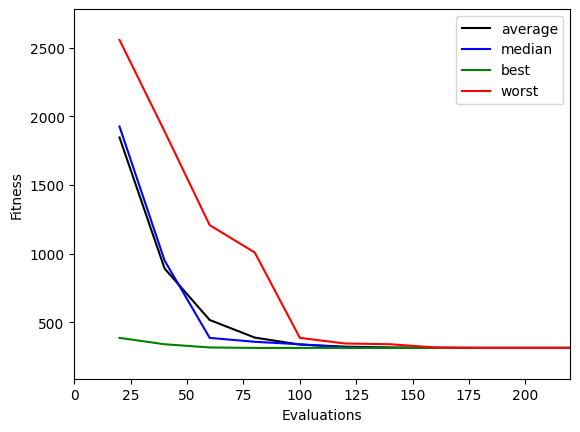

In [27]:
!pip3 install pygame
from utils.utils_9.exercise_maze import *
import os 

# --------------------------------------------------------------------------- #
# Change this part, but not the map

def fitness_eval1(distanceToTarget, pathLength, noOfTimestepsWithCollisions,
                 timestepToReachTarget, timestepsOnTarget):
    fitness = distanceToTarget  # Penalizziamo la distanza residua al target.
    # Penalizziamo il numero di timesteps necessari per raggiungere il target.
    if timestepToReachTarget > 0:
        fitness += 1 * timestepToReachTarget
    # Penalizziamo le collisioni (molto importante da evitare).
    fitness += 3.0 * noOfTimestepsWithCollisions
    # Penalizziamo percorsi troppo lunghi (per incentivare l'efficienza).
    fitness += 0.5 * pathLength
    # Incentiviamo se il robot rimane sul target.
    if timestepsOnTarget > 0:
        fitness -= 5.0 * timestepsOnTarget
    return fitness

config = {"sensors": False,
            "nrHiddenNodes":  4,
            "nrHiddenLayers": 1,
            "map":"white.png"
         }
seed = 0
rng = NumpyRandomWrapper(seed)


# --------------------------------------------------------------------------- #
# EA configuration
display = True

popSize = 20  # population size
numGen = 10  # used with generation_termination
numEval = 2500  # used with evaluation_termination
tournamentSize = 5  # tournament size (default 2)
mutationRate = 0.5  # mutation rate, per gene (default 0.1)
gaussianMean = 0  #  mean of the Gaussian distribution used for mutation
gaussianStdev = 0.1  #  std. dev. of the Gaussian distribution used for mutation
crossoverRate = 1.0  # rate at which crossover is performed (default 1.0)
numCrossoverPoints = 2  # number of crossover points used (default 1)
selectionSize = popSize  # selection size (i.e. how many individuals are selected for reproduction)
numElites = 1  # no. of elites (i.e. best individuals that are kept in the population)

# the evolutionary algorithm (EvolutionaryComputation is a fully configurable evolutionary algorithm)
#  standard GA, ES, SA, DE, EDA, PAES, NSGA2, PSO and ACO are also available
ea = inspyred.ec.EvolutionaryComputation(rng)

# observers: provide various logging features
if display:
    ea.observer = [inspyred.ec.observers.stats_observer,
                   plot_observer]
    # inspyred.ec.observers.file_observer,
    # inspyred.ec.observers.best_observer,
    # inspyred.ec.observers.population_observer,

#  selection operator
# ea.selector = inspyred.ec.selectors.truncation_selection
# ea.selector = inspyred.ec.selectors.uniform_selection
# ea.selector = inspyred.ec.selectors.fitness_proportionate_selection
# ea.selector = inspyred.ec.selectors.rank_selection
# ea.selector = inspyred.ec.selectors.tournament_selection

ea.selector = inspyred.ec.selectors.rank_selection

# variation operators (mutation/crossover)
ea.variator = [inspyred.ec.variators.gaussian_mutation,
               inspyred.ec.variators.n_point_crossover]
# inspyred.ec.variators.random_reset_mutation,
# inspyred.ec.variators.inversion_mutation,
# inspyred.ec.variators.uniform_crossover,
# inspyred.ec.variators.partially_matched_crossover,

# replacement operator
# ea.replacer = inspyred.ec.replacers.truncation_replacement
# ea.replacer = inspyred.ec.replacers.steady_state_replacement
# ea.replacer = inspyred.ec.replacers.random_replacement
# ea.replacer = inspyred.ec.replacers.plus_replacement
# ea.replacer = inspyred.ec.replacers.comma_replacement
# ea.replacer = inspyred.ec.replacers.crowding_replacement
# ea.replacer = inspyred.ec.replacers.simulated_annealing_replacement
# ea.replacer = inspyred.ec.replacers.nsga_replacement
# ea.replacer = inspyred.ec.replacers.paes_replacement
# ea.replacer = inspyred.ec.replacers.generational_replacement
ea.replacer = inspyred.ec.replacers.simulated_annealing_replacement

# termination condition
# ea.terminator = inspyred.ec.terminators.evaluation_termination
# ea.terminator = inspyred.ec.terminators.no_improvement_termination
# ea.terminator = inspyred.ec.terminators.diversity_termination
# ea.terminator = inspyred.ec.terminators.time_termination
# ea.terminator = inspyred.ec.terminators.generation_termination
ea.terminator = inspyred.ec.terminators.generation_termination

# --------------------------------------------------------------------------- #

# the robot maze navigation problem
problem = RobotEvaluator(config, seed, eval_func=fitness_eval1, maximize=False)

args = {}
args["fig_title"] = "EA"

# run the EA
final_pop = ea.evolve(generator=problem.generator,
                      evaluator=problem.evaluator,
                      bounder=problem.bounder,
                      maximize=problem.maximize,
                      pop_size=popSize,
                      max_generations=numGen,
                      # max_evaluations=numEval,
                      tournament_size=tournamentSize,
                      mutation_rate=mutationRate,
                      gaussian_mean=gaussianMean,
                      gaussian_stdev=gaussianStdev,
                      crossover_rate=crossoverRate,
                      num_crossover_points=numCrossoverPoints,
                      num_selected=selectionSize,
                      num_elites=numElites, **args)

# --------------------------------------------------------------------------- #
best_candidate = final_pop[0].candidate
best_fitness = final_pop[0].fitness
os.makedirs("results", exist_ok=True)
pickle.dump(([best_candidate], "utils/utils_9/"+config["map"], config, True), open("results/best_1.pkl", "wb"))


os.popen("python post_eval.py results/best_1.pkl").read()

In [2]:
import os
os.popen("python post_eval.py results/best_1.pkl").read()

'pygame 2.6.1 (SDL 2.28.4, Python 3.11.7)\nHello from the pygame community. https://www.pygame.org/contribute.html\n'

In [29]:
import pickle

# Specifica il percorso del tuo file .pkl
file_path = 'results/best_1.pkl'

# Carica il file
with open(file_path, 'rb') as file:
    data = pickle.load(file)

# Visualizza il contenuto del file
print(data)

([[-1.2418782929532197, 2.1121731133182844, 0.7072601515051429, -2.920578853446603, -1.0140198055364777, -2.1111548343110096, 2.8221556709207585, -0.15912666324900937, -0.015651807008024043, 0.8368350983923416, -0.7884923632222947, -2.1785983698864064, 1.9327063991654736, -1.8609125285834522, 0.06791389527873637, -1.6540978261515644, -2.3486276385018665, 2.162055049047129, 2.8464057080085747, 2.7309697140038787, 2.4393329953270735, 1.6442839961918327, -1.0355489227773667, -2.420181366407479, -0.556552971517156, -1.6065951469743436, -2.0971159898256575, -2.7800507883238894]], 'utils/utils_9/white.png', {'sensors': False, 'nrHiddenNodes': 4, 'nrHiddenLayers': 1, 'map': 'white.png'}, True)


# Exercise 2
Let us consider now a second scenario (environment with obstacles). To do so, change in the
configuration dict the parameter map to be ``hard.png``.
First of all, it is interesting to see if the controller evolved in the previous exercise is able to generalize its functioning to this case.
- Take the best Neural Network evolved in the previous exercise and run it in the new scenario, running the next cell.
- What happens in this case? Is the best Neural Network evolved in the previous exercise able to generalize to this new environment? Why?
Quando esegui il miglior controller evoluto nel nuovo ambiente con ostacoli, è molto probabile che il robot non riesca a completare con successo il compito di navigazione verso il target. Questo è dovuto al fatto che il controller originale non è stato allenato per gestire la presenza di ostacoli, ma solo per muoversi direttamente verso il target in uno spazio vuoto.

Nello scenario senza ostacoli, il controller ha imparato una strategia che si basa esclusivamente sulla distanza e sull'angolo rispetto al target. Questa strategia è ottima per un ambiente vuoto, ma diventa problematica in presenza di ostacoli. Il robot non ha sviluppato alcuna capacità di evitare ostacoli, semplicemente perché non erano presenti durante l'addestramento.

In [3]:
import pickle

best_path = "results/best_0.pkl"
data = pickle.load(open(best_path, "rb"))
new_data = (data[0], "utils/utils_9/hard.png", data[2], True)
pickle.dump(new_data, open("results/tmp.pkl", "wb"))

os.popen("python post_eval.py results/tmp.pkl").read()

'pygame 2.6.1 (SDL 2.28.4, Python 3.11.7)\nHello from the pygame community. https://www.pygame.org/contribute.html\n'

In [4]:
import pickle

best_path = "results/best_1.pkl"
data = pickle.load(open(best_path, "rb"))
new_data = (data[0], "utils/utils_9/hard.png", data[2], True)
pickle.dump(new_data, open("results/tmp.pkl", "wb"))

os.popen("python post_eval.py results/tmp.pkl").read()

'pygame 2.6.1 (SDL 2.28.4, Python 3.11.7)\nHello from the pygame community. https://www.pygame.org/contribute.html\n'

Consider now running a new evolutionary process from scratch, to evolve a controller specific for this new, somehow harder environment.

- Is the same fitness function you designed in the previous exercise able to guide the evolutionary search also in this case? If not, try to change it appropriately (Hint: you may want to embed in the fitness value multiple metrics, and use some weights if needed). Does the best individual evolved in this scenario generalize to the first scenario?

- Try to make the problem even harder, in the attempt to find a controller that is able to drive the robot to the target without touching any walls. What kind of fitness function could you use in this case? You may also want to consider changing the configuration/parameters of the EA (e.g. larger population, higher number of generations, different mutation/crossover parameters) and/or the architecture/parameters of the Neural Network (e.g. add more hidden nodes).

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         0         20 3753.78841 2068.72960 2473.50081 2602.08170 473.465889

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         1         40 3701.49628 2029.84600 2576.28760 2679.06665 569.130391

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         2         60 3799.53185 2029.84600 2806.46039 2861.51437 606.203441

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         3         80 3483.67515 2029.84600 2471.62284 2521.76973 401.936563

Generation Evaluation      Worst       Best     Median    Average    Std

''

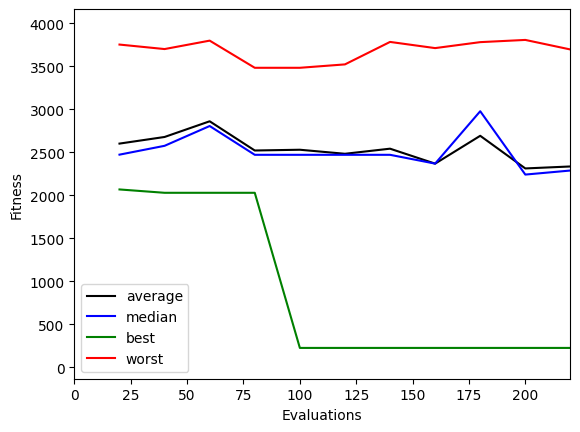

In [33]:
from utils.utils_9.exercise_maze import *
import os 

# --------------------------------------------------------------------------- #
# Change this part, but not the map

def fitness_eval0(distanceToTarget, pathLength, noOfTimestepsWithCollisions,
                 timestepToReachTarget, timestepsOnTarget):
    fitness = distanceToTarget
    return fitness

def fitness_eval1(distanceToTarget, pathLength, noOfTimestepsWithCollisions,
                 timestepToReachTarget, timestepsOnTarget):
    fitness =  1.4 * distanceToTarget  # Penalizziamo la distanza residua al target.

    fitness += 0.5 * timestepToReachTarget
    fitness += 1.3*pathLength
    
    # Penalizziamo le collisioni.
    fitness += 5.0 * noOfTimestepsWithCollisions
    
    # Incentiviamo se il robot rimane sul target.
    if timestepsOnTarget > 0:
        fitness -= 5.0 * timestepsOnTarget
    return fitness

config = {"sensors": True,
            "nrHiddenNodes":  5,
            "nrHiddenLayers": 10,
            "map":"hard.png"
         }
seed = 0
rng = NumpyRandomWrapper(seed)

# --------------------------------------------------------------------------- #
# EA configuration
display = True

popSize = 20  # population size
numGen = 10 # used with generation_termination
numEval = 2500  # used with evaluation_termination
tournamentSize = 4  # tournament size (default 2)
mutationRate = 0.2  # mutation rate, per gene (default 0.1)
gaussianMean = 0  #  mean of the Gaussian distribution used for mutation
gaussianStdev = 0.3  #  std. dev. of the Gaussian distribution used for mutation
crossoverRate = 1.0  # rate at which crossover is performed (default 1.0)
numCrossoverPoints = 2  # number of crossover points used (default 1)
selectionSize = popSize  # selection size (i.e. how many individuals are selected for reproduction)
numElites = 1  # no. of elites (i.e. best individuals that are kept in the population)

# the evolutionary algorithm (EvolutionaryComputation is a fully configurable evolutionary algorithm)
#  standard GA, ES, SA, DE, EDA, PAES, NSGA2, PSO and ACO are also available
ea = inspyred.ec.EvolutionaryComputation(rng)

# observers: provide various logging features
# observers: provide various logging features
if display:
    ea.observer = [inspyred.ec.observers.stats_observer,
                   plot_observer]
    # inspyred.ec.observers.file_observer,
    # inspyred.ec.observers.best_observer,
    # inspyred.ec.observers.population_observer,

#  selection operator
# ea.selector = inspyred.ec.selectors.truncation_selection
# ea.selector = inspyred.ec.selectors.uniform_selection
# ea.selector = inspyred.ec.selectors.fitness_proportionate_selection
# ea.selector = inspyred.ec.selectors.rank_selection
# ea.selector = inspyred.ec.selectors.tournament_selection

ea.selector = inspyred.ec.selectors.rank_selection
# variation operators (mutation/crossover)
ea.variator = [inspyred.ec.variators.gaussian_mutation,
               inspyred.ec.variators.n_point_crossover,
               inspyred.ec.variators.random_reset_mutation]
# inspyred.ec.variators.random_reset_mutation,
# inspyred.ec.variators.inversion_mutation,
# inspyred.ec.variators.uniform_crossover,
# inspyred.ec.variators.partially_matched_crossover,

# replacement operator
# ea.replacer = inspyred.ec.replacers.truncation_replacement
# ea.replacer = inspyred.ec.replacers.steady_state_replacement
# ea.replacer = inspyred.ec.replacers.random_replacement
# ea.replacer = inspyred.ec.replacers.plus_replacement
# ea.replacer = inspyred.ec.replacers.comma_replacement
# ea.replacer = inspyred.ec.replacers.crowding_replacement
# ea.replacer = inspyred.ec.replacers.simulated_annealing_replacement
# ea.replacer = inspyred.ec.replacers.nsga_replacement
# ea.replacer = inspyred.ec.replacers.paes_replacement
# ea.replacer = inspyred.ec.replacers.generational_replacement
ea.replacer = inspyred.ec.replacers.random_replacement

# termination condition
# ea.terminator = inspyred.ec.terminators.evaluation_termination
# ea.terminator = inspyred.ec.terminators.no_improvement_termination
# ea.terminator = inspyred.ec.terminators.diversity_termination
# ea.terminator = inspyred.ec.terminators.time_termination
# ea.terminator = inspyred.ec.terminators.generation_termination
ea.terminator = inspyred.ec.terminators.generation_termination

# --------------------------------------------------------------------------- #

# the robot maze navigation problem
problem = RobotEvaluator(config, seed, eval_func=fitness_eval1, maximize=False)

args = {}
args["fig_title"] = "EA"

# run the EA
final_pop = ea.evolve(generator=problem.generator,
                      evaluator=problem.evaluator,
                      bounder=problem.bounder,
                      maximize=problem.maximize,
                      pop_size=popSize,
                      max_generations=numGen,
                      # max_evaluations=numEval,
                      tournament_size=tournamentSize,
                      mutation_rate=mutationRate,
                      gaussian_mean=gaussianMean,
                      gaussian_stdev=gaussianStdev,
                      crossover_rate=crossoverRate,
                      num_crossover_points=numCrossoverPoints,
                      num_selected=selectionSize,
                      num_elites=numElites, **args)

# --------------------------------------------------------------------------- #
best_candidate = final_pop[0].candidate
best_fitness = final_pop[0].fitness
os.makedirs("results", exist_ok=True)
pickle.dump(([best_candidate], "utils/utils_9/"+config["map"], config, True), open("results/best_2.pkl", "wb"))

os.popen("python post_eval.py results/best_2.pkl").read()

In [6]:
import os
os.popen("python post_eval.py results/best_2.pkl").read()

'pygame 2.6.1 (SDL 2.28.4, Python 3.11.7)\nHello from the pygame community. https://www.pygame.org/contribute.html\n'

provo con una mia mappa -> parametri uguali a prima 

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         0         20 3713.25290 2298.28567 2597.60985 2781.69975 420.839628

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         1         40 3553.19646 2238.46640 2471.62284 2580.72139 330.584976

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         2         60 3323.77461 1973.52947 2471.62284 2583.04307 390.577820

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         3         80 3329.48633 1973.52947 2471.62284 2557.92462 343.762866

Generation Evaluation      Worst       Best     Median    Average    Std

''

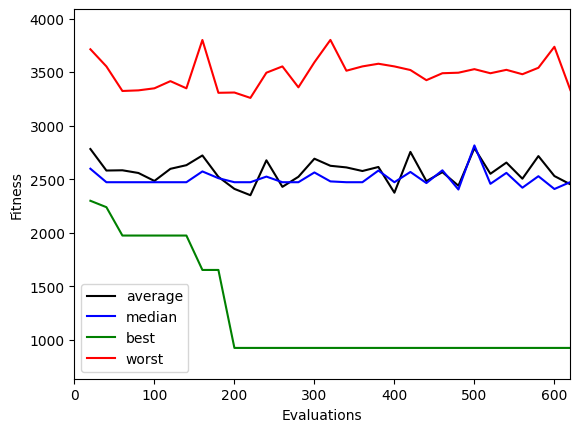

In [11]:
from utils.utils_9.exercise_maze import *
import os 

# --------------------------------------------------------------------------- #
# Change this part, but not the map

def fitness_eval0(distanceToTarget, pathLength, noOfTimestepsWithCollisions,
                 timestepToReachTarget, timestepsOnTarget):
    fitness = distanceToTarget
    return fitness

def fitness_eval1(distanceToTarget, pathLength, noOfTimestepsWithCollisions,
                 timestepToReachTarget, timestepsOnTarget):
    fitness =  1.4 * distanceToTarget  # Penalizziamo la distanza residua al target.

    fitness += 0.5 * timestepToReachTarget
    fitness += 1.3*pathLength
    
    # Penalizziamo le collisioni.
    fitness += 5.0 * noOfTimestepsWithCollisions
    
    # Incentiviamo se il robot rimane sul target.
    if timestepsOnTarget > 0:
        fitness -= 5.0 * timestepsOnTarget
    return fitness

config = {"sensors": True,
            "nrHiddenNodes":  5,
            "nrHiddenLayers": 10,
            "map":"hard_2.png"
         }
seed = 0
rng = NumpyRandomWrapper(seed)

# --------------------------------------------------------------------------- #
# EA configuration
display = True

popSize = 20  # population size
numGen = 10 # used with generation_termination
numEval = 2500  # used with evaluation_termination
tournamentSize = 4  # tournament size (default 2)
mutationRate = 0.2  # mutation rate, per gene (default 0.1)
gaussianMean = 0  #  mean of the Gaussian distribution used for mutation
gaussianStdev = 0.3  #  std. dev. of the Gaussian distribution used for mutation
crossoverRate = 1.0  # rate at which crossover is performed (default 1.0)
numCrossoverPoints = 2  # number of crossover points used (default 1)
selectionSize = popSize  # selection size (i.e. how many individuals are selected for reproduction)
numElites = 1  # no. of elites (i.e. best individuals that are kept in the population)

# the evolutionary algorithm (EvolutionaryComputation is a fully configurable evolutionary algorithm)
#  standard GA, ES, SA, DE, EDA, PAES, NSGA2, PSO and ACO are also available
ea = inspyred.ec.EvolutionaryComputation(rng)

# observers: provide various logging features
# observers: provide various logging features
if display:
    ea.observer = [inspyred.ec.observers.stats_observer,
                   plot_observer]
    # inspyred.ec.observers.file_observer,
    # inspyred.ec.observers.best_observer,
    # inspyred.ec.observers.population_observer,

#  selection operator
# ea.selector = inspyred.ec.selectors.truncation_selection
# ea.selector = inspyred.ec.selectors.uniform_selection
# ea.selector = inspyred.ec.selectors.fitness_proportionate_selection
# ea.selector = inspyred.ec.selectors.rank_selection
# ea.selector = inspyred.ec.selectors.tournament_selection

ea.selector = inspyred.ec.selectors.rank_selection
# variation operators (mutation/crossover)
ea.variator = [inspyred.ec.variators.gaussian_mutation,
               inspyred.ec.variators.n_point_crossover,
               inspyred.ec.variators.random_reset_mutation]
# inspyred.ec.variators.random_reset_mutation,
# inspyred.ec.variators.inversion_mutation,
# inspyred.ec.variators.uniform_crossover,
# inspyred.ec.variators.partially_matched_crossover,

# replacement operator
# ea.replacer = inspyred.ec.replacers.truncation_replacement
# ea.replacer = inspyred.ec.replacers.steady_state_replacement
# ea.replacer = inspyred.ec.replacers.random_replacement
# ea.replacer = inspyred.ec.replacers.plus_replacement
# ea.replacer = inspyred.ec.replacers.comma_replacement
# ea.replacer = inspyred.ec.replacers.crowding_replacement
# ea.replacer = inspyred.ec.replacers.simulated_annealing_replacement
# ea.replacer = inspyred.ec.replacers.nsga_replacement
# ea.replacer = inspyred.ec.replacers.paes_replacement
# ea.replacer = inspyred.ec.replacers.generational_replacement
ea.replacer = inspyred.ec.replacers.random_replacement

# termination condition
# ea.terminator = inspyred.ec.terminators.evaluation_termination
# ea.terminator = inspyred.ec.terminators.no_improvement_termination
# ea.terminator = inspyred.ec.terminators.diversity_termination
# ea.terminator = inspyred.ec.terminators.time_termination
# ea.terminator = inspyred.ec.terminators.generation_termination
ea.terminator = inspyred.ec.terminators.generation_termination

# --------------------------------------------------------------------------- #

# the robot maze navigation problem
problem = RobotEvaluator(config, seed, eval_func=fitness_eval1, maximize=False)

args = {}
args["fig_title"] = "EA"

# run the EA
final_pop = ea.evolve(generator=problem.generator,
                      evaluator=problem.evaluator,
                      bounder=problem.bounder,
                      maximize=problem.maximize,
                      pop_size=popSize,
                      max_generations=numGen,
                      # max_evaluations=numEval,
                      tournament_size=tournamentSize,
                      mutation_rate=mutationRate,
                      gaussian_mean=gaussianMean,
                      gaussian_stdev=gaussianStdev,
                      crossover_rate=crossoverRate,
                      num_crossover_points=numCrossoverPoints,
                      num_selected=selectionSize,
                      num_elites=numElites, **args)

# --------------------------------------------------------------------------- #
best_candidate = final_pop[0].candidate
best_fitness = final_pop[0].fitness
os.makedirs("results", exist_ok=True)
pickle.dump(([best_candidate], "utils/utils_9/"+config["map"], config, True), open("results/best_3.pkl", "wb"))

os.popen("python post_eval.py results/best_3.pkl").read()

In [12]:
os.popen("python post_eval.py results/best_3.pkl").read()

''

Note, you can also design your map, just take the ``white.png`` in the utils folder and modify it with any image editor (e.g. gimp, paint, etc.). Remember to use Black to draw the walls and to make them thick enough, otherwise the car could pass through them. 
Save the new map in the same folder of the ``white.png`` file and modify the config dict element "map" with the name of your map.

## Instruction and questions
Concisely note down your observations from the previous exercises (follow the bullet points) and think about the following questions. 
- What do you think it could change between a simulated and a real-world experiment in the case of a maze navigation task?

In real-world experiments, sensors (e.g., lidar, distance sensors) are affected by noise, inaccuracies, and environmental conditions (e.g., lighting, reflections).
Simulations typically assume ideal sensor readings, which may lead to overly optimistic performance.
Motors and wheels in real-world robots may experience slippage, wear, and inaccurate movement, unlike in simulations where actions are executed precisely.


- Can you think of some possible applications where a maze navigation robot task could be used? Why would it make sense to use Swarm/Evolutionary Robotics in those cases?

Search and Rescue Missions:

Robots can navigate through collapsed buildings or disaster zones to locate survivors.
Swarm Robotics allows multiple robots to explore large or dangerous areas efficiently.
Warehouse Automation:

Robots can navigate through complex warehouse layouts to transport goods.
Evolutionary algorithms can optimize routes and behaviors for efficiency and adaptability.
Autonomous Vehicles:

Vehicles navigating through urban environments with dynamic obstacles and pedestrians.
Evolutionary methods can optimize path planning and obstacle avoidance strategies.
Medical Applications:

Robots navigating through hospital corridors to deliver medicine or supplies.
Swarm robotics can ensure deliveries are made efficiently without congestion.
Exploration of Hazardous Environments:

Robots exploring nuclear facilities, underwater caves, or space environments.
Swarm robotics can improve reliability and coverage by distributing tasks among multiple robots.